# Customer Eligible for credit card or not  >>>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/loancheck/UniversalBank.csv')

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: xlabel='Age', ylabel='count'>

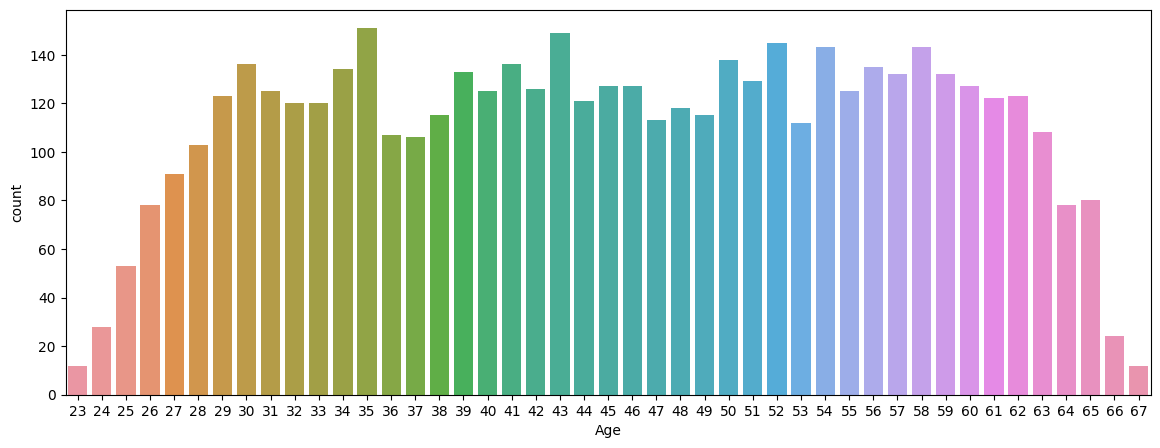

In [5]:
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(x = 'Age' ,data=data)

- no need of id and zip 

In [6]:
data.drop(columns = ['ZIP Code', 'ID'] , inplace =True)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<Axes: >

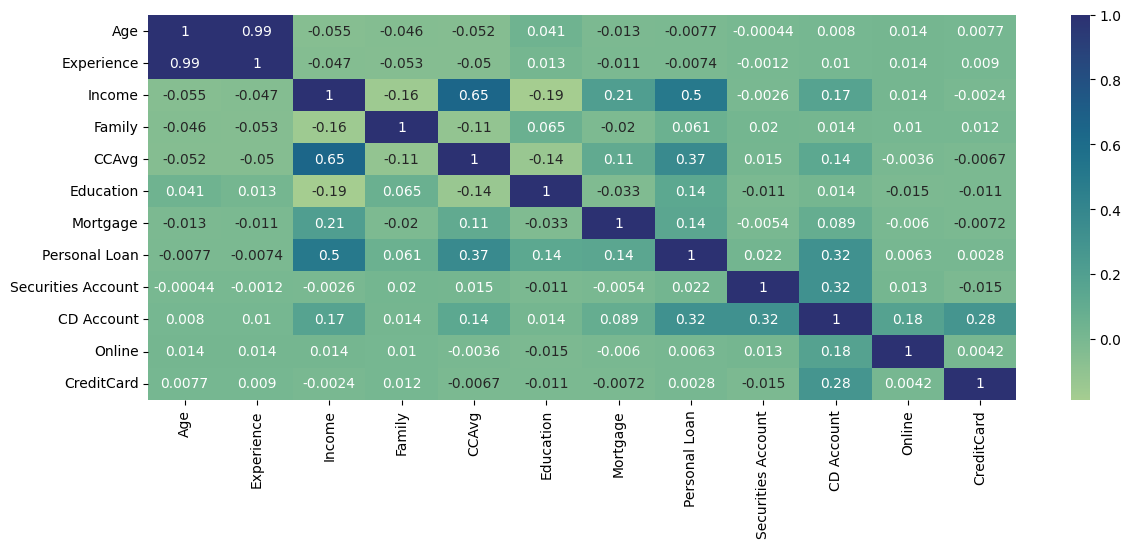

In [7]:
fig, ax = plt.subplots(figsize=(14,5))
sns.heatmap(data.corr(), annot = True , cmap = 'crest')

- Lets see those who have allocated credit card

In [35]:
cols = [col for col in data.columns if col not in ['Income','CCAvg','CreditCard' , 'Mortgage']]
cols

['Age',
 'Experience',
 'Family',
 'Education',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online']

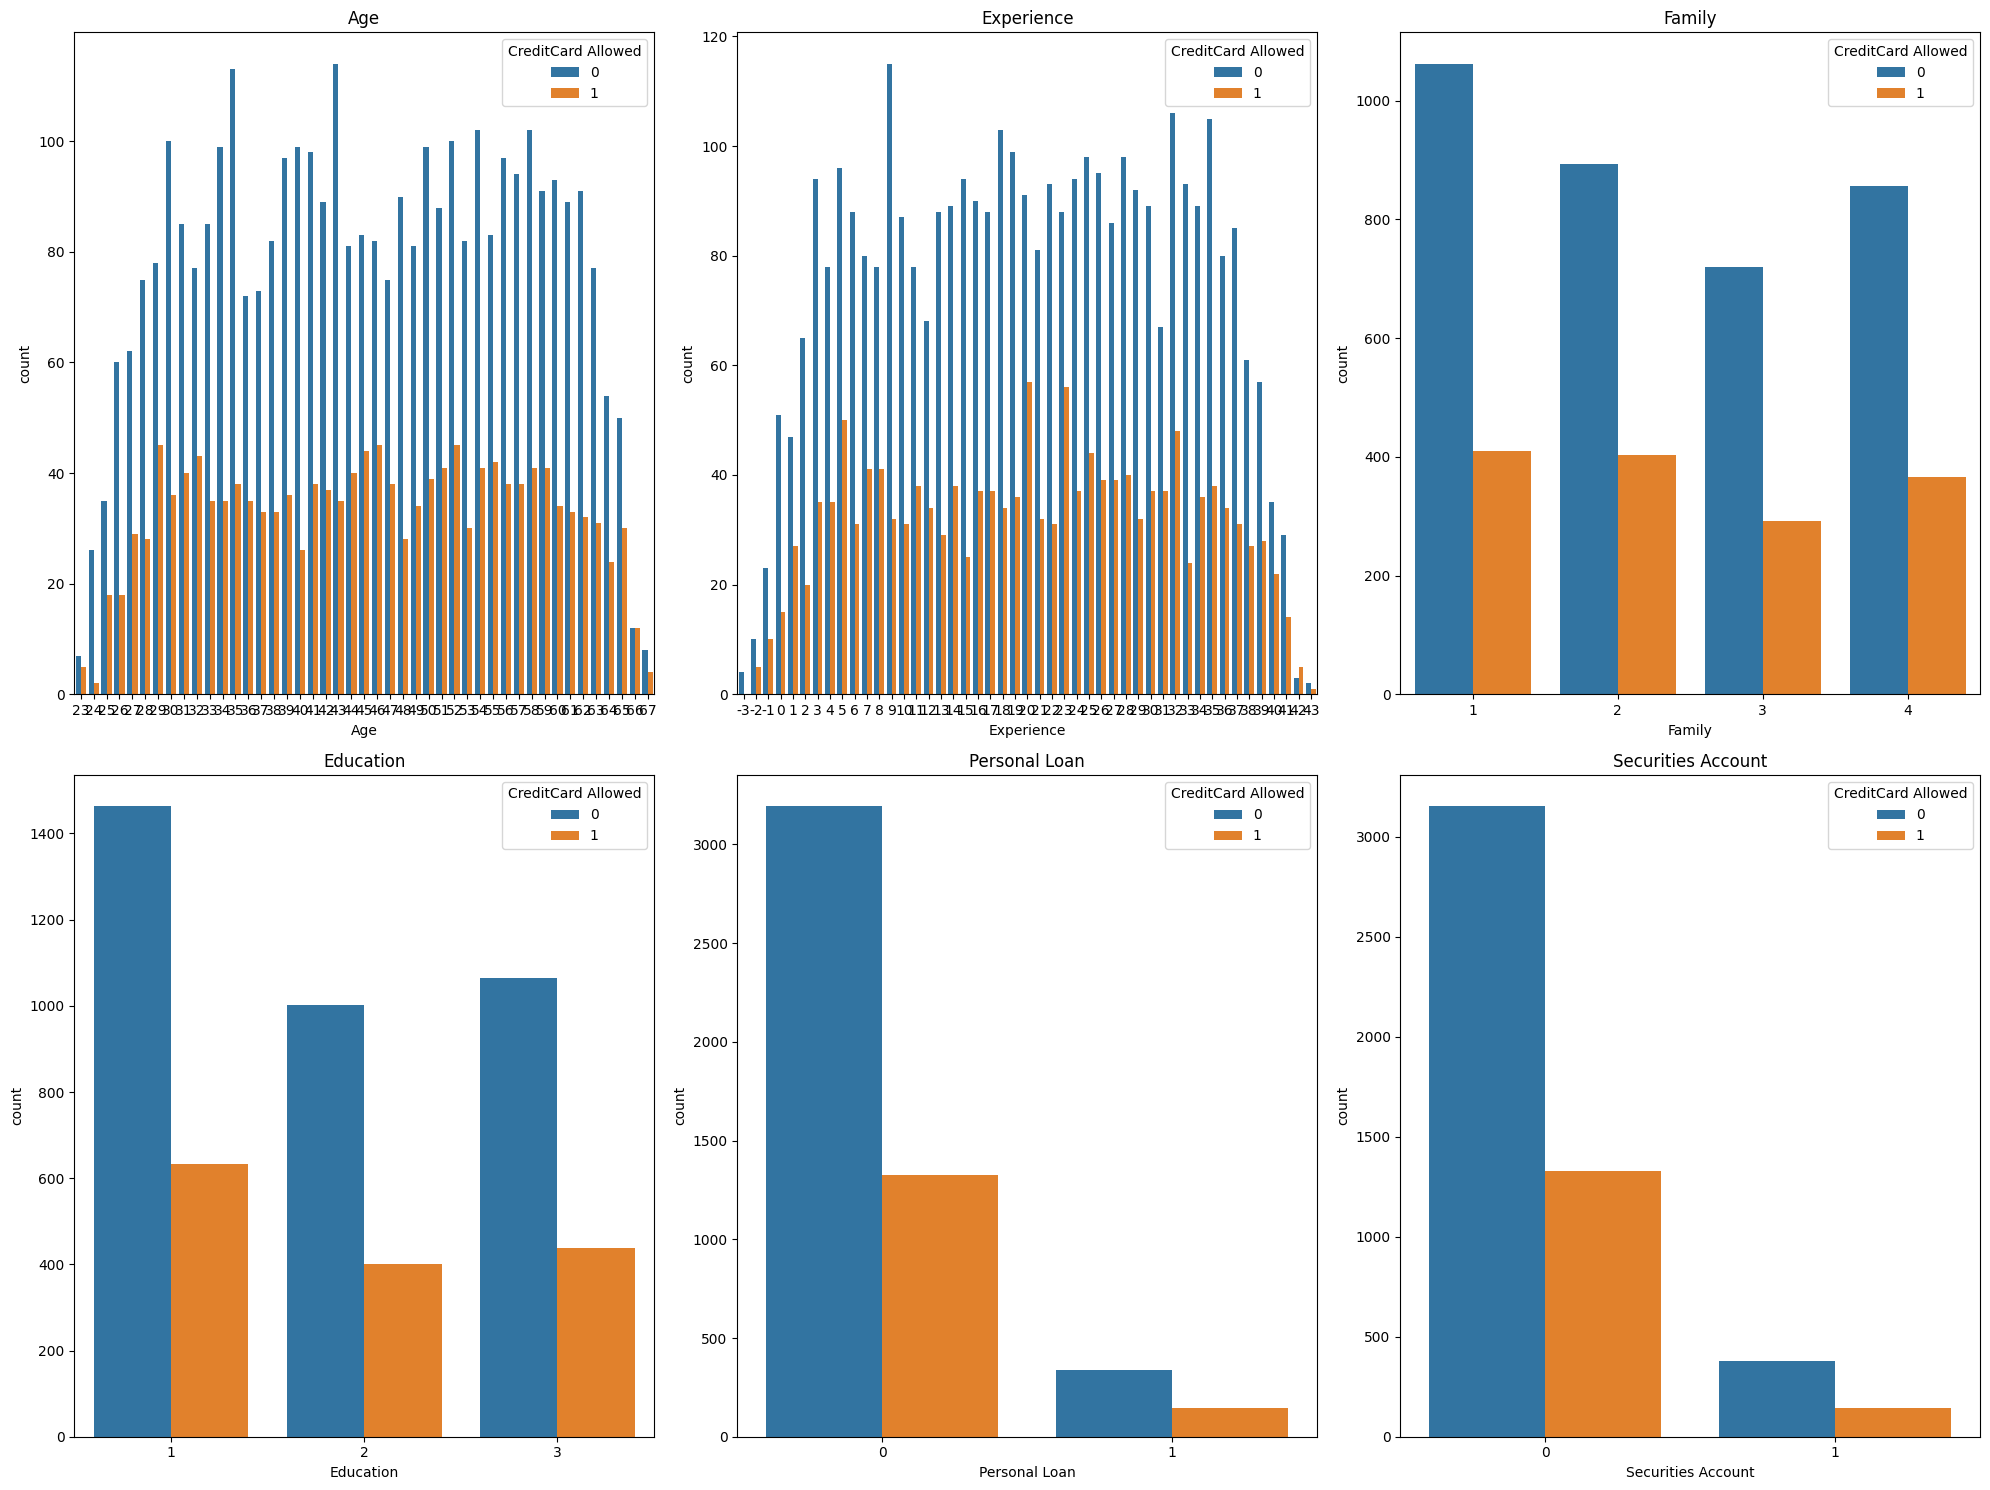

In [38]:
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_rows*10,n_cols*5))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(x = data[cols[i]],hue=data['CreditCard'],ax=ax , orient='horizontal')
        ax.set_title(cols[i])
        ax.legend(title='CreditCard Allowed',loc='upper right')
plt.tight_layout()

- Is class balanced ? 

<Axes: xlabel='CreditCard', ylabel='count'>

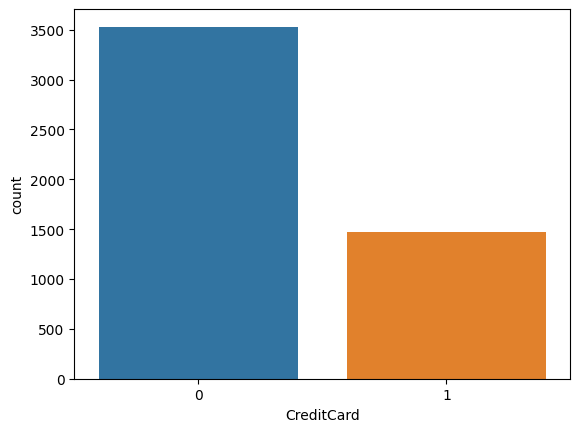

In [49]:
sns.countplot(data , x = 'CreditCard')

- Perform Scaling

In [44]:
X  = data.drop(columns = ['CreditCard']);
y = data['CreditCard']

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X)

df_scaled = pd.DataFrame(scaled_data, columns=X.columns[:])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


# Applying SVM

In [48]:
# train test
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(scaled_data,y , test_size = 0.33 , random_state=1)
print("Shape of Feature Matrix : ",X_train.shape," : ",X_test.shape)
print("Shape of Feature Matrix : ",y_train.shape," : ",y_test.shape)

Shape of Feature Matrix :  (3350, 11)  :  (1650, 11)
Shape of Feature Matrix :  (3350,)  :  (1650,)


In [66]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss,confusion_matrix, roc_curve,accuracy_score

support_vector_classifier = SVC(probability=True)
support_vector_classifier.fit(X_train,y_train)

SVC(probability=True)

In [56]:
print("Score on train Set : ", support_vector_classifier.score(X_train,y_train))

Score on train Set :  0.7465671641791045


In [57]:
print("Score on Test Set : ", support_vector_classifier.score(X_test,y_test))

Score on Test Set :  0.7484848484848485


In [59]:
y_prob  = support_vector_classifier.predict_proba(X_test)
logloss = log_loss(y_test, y_prob)

print(f'Negative Log Loss: {logloss}')

Negative Log Loss: 0.5611740053668639


<Axes: >

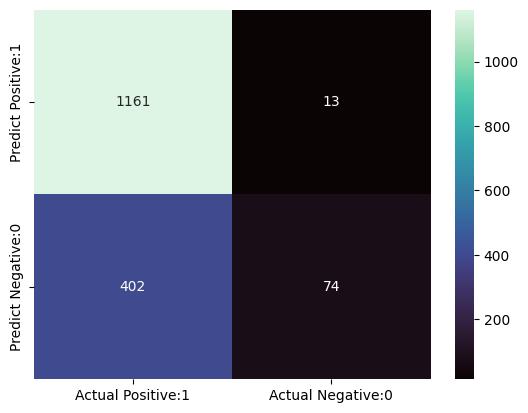

In [62]:
y_pred = support_vector_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1174
           1       0.85      0.16      0.26       476

    accuracy                           0.75      1650
   macro avg       0.80      0.57      0.56      1650
weighted avg       0.77      0.75      0.68      1650



In [70]:
rbf_svc=SVC(kernel='rbf').fit(X_train,y_train)
rbf_y_pred = rbf_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.748


<Axes: >

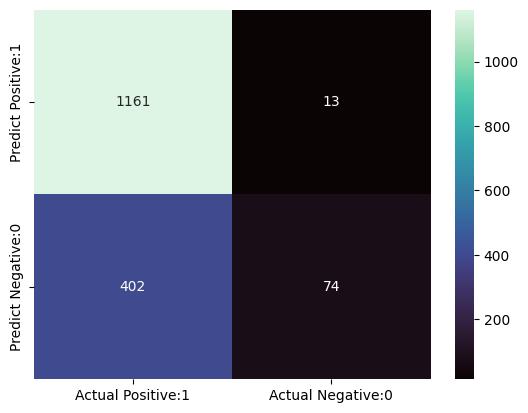

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rbf_y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [72]:
Poly_svc=SVC(kernel='poly', C=1).fit(X_train,y_train)
poly_y_pred = Poly_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.748


<Axes: >

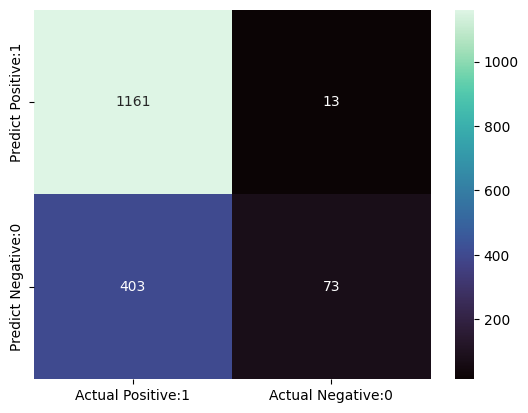

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, poly_y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Lets Fun with Kernels

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [81]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
kernels = ['linear', 'poly', 'rbf']
models = [SVC(kernel=kernel, probability=True, random_state=42) for kernel in kernels]

In [85]:
for model in models:
    model.fit(X_train, y_train)

/tmp/ipykernel_781/2191199018.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100)
/tmp/ipykernel_781/2191199018.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100)
/tmp/ipykernel_781/2191199018.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100)


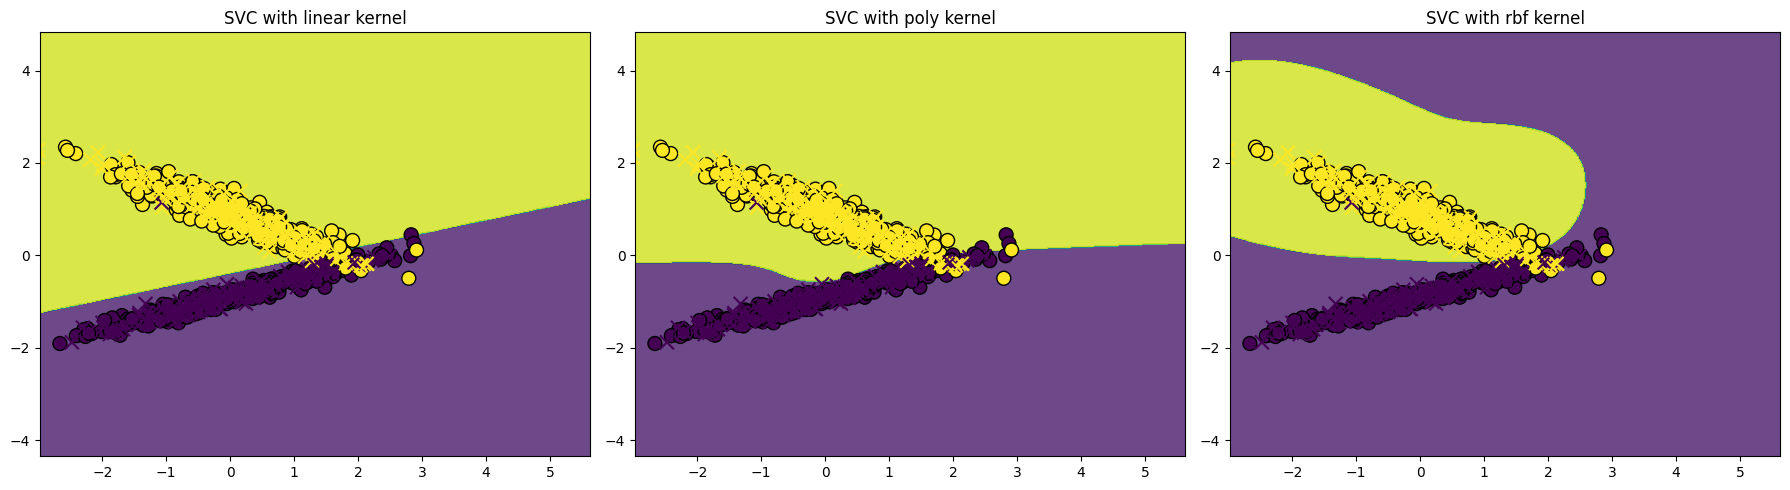

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, model in enumerate(models):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[i].contourf(xx, yy, Z, alpha=0.8)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100)
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100)
    axes[i].set_title(f'SVC with {kernels[i]} kernel')
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

In [91]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)


scaler = StandardScaler()
X = scaler.fit_transform(X)


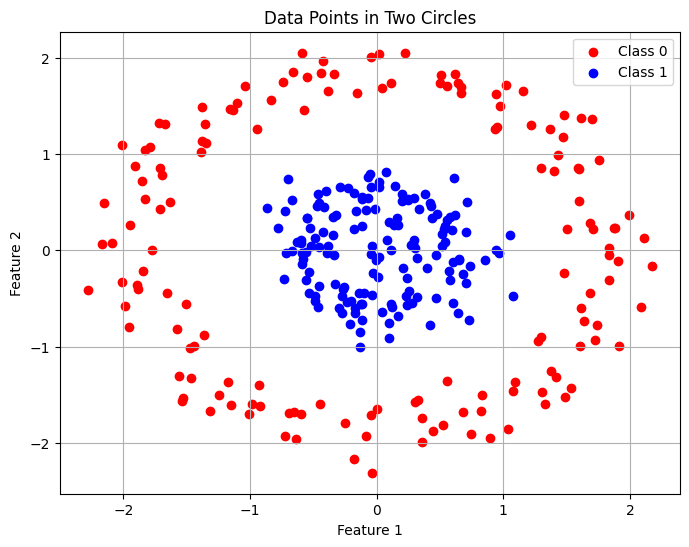

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.title('Data Points in Two Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

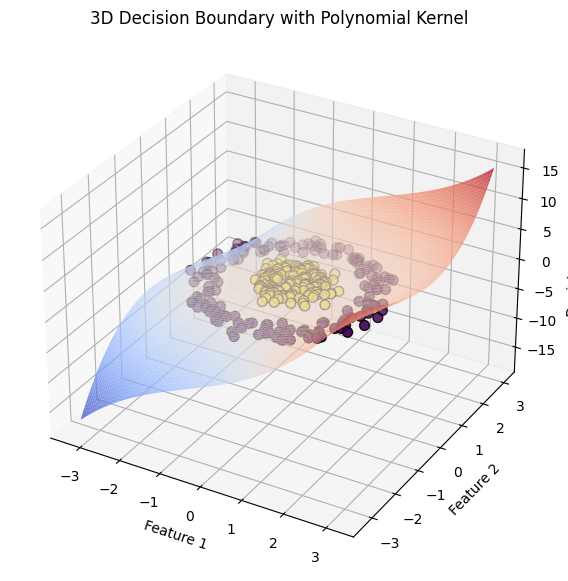

In [93]:

model = SVC(kernel='poly', degree=3, probability=True, random_state=42)
model.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))


Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm')

ax.scatter(X[:, 0], X[:, 1], y, c=y, edgecolors='k', marker='o', s=50)
=
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function')
ax.set_title('3D Decision Boundary with Polynomial Kernel')

plt.show()

In [95]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(z=Z, x=xx, y=yy, colorscale='Viridis', opacity=0.8),
    go.Scatter3d(x=X[y == 0, 0], y=X[y == 0, 1], z=[-1] * len(X[y == 0]), mode='markers', marker=dict(color='red', size=5), name='Class 0'),
    go.Scatter3d(x=X[y == 1, 0], y=X[y == 1, 1], z=[-1] * len(X[y == 1]), mode='markers', marker=dict(color='blue', size=5), name='Class 1')
])

fig.update_layout(
    title='3D Decision Boundary with Polynomial Kernel',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Decision Function'
    )
)

fig.show()